In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

In [2]:
path = '/content/drive/MyDrive/Dataset/ai_assistant_usage_student_life.csv'
df=pd.read_csv(path)

In [3]:
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [4]:
df.drop(['SessionID', 'SessionDate'], axis=1, inplace=True)

In [5]:
df.shape

(10000, 9)

In [6]:
df.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


In [7]:
cat_collum = ['StudentLevel',	'Discipline','TaskType','FinalOutcome']

data = setup(data = df, target = 'UsedAgain', categorical_features = cat_collum,
             fix_imbalance = True, normalize = True,pca = True, pca_components=.90)

,Description,Value
0,Session id,4631
1,Target,UsedAgain
2,Target type,Binary
3,Original data shape,"(10000, 9)"
4,Transformed data shape,"(12890, 17)"
5,Transformed train set shape,"(9890, 17)"
6,Transformed test set shape,"(3000, 17)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


In [8]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7391,0.6756,0.8423,0.7992,0.8201,0.3465,0.3483,0.3080
ridge,Ridge Classifier,0.7347,0.6806,0.8338,0.7993,0.8161,0.3405,0.3416,0.1870
lr,Logistic Regression,0.7333,0.6776,0.8313,0.7992,0.8149,0.3383,0.3393,1.0810
lda,Linear Discriminant Analysis,0.7327,0.6779,0.8301,0.7993,0.8144,0.3377,0.3386,0.2990
gbc,Gradient Boosting Classifier,0.7256,0.6767,0.8186,0.7981,0.8081,0.3264,0.3270,5.9980
svm,SVM - Linear Kernel,0.7224,0.6732,0.8107,0.7992,0.8047,0.3245,0.3251,0.2810
catboost,CatBoost Classifier,0.7181,0.6663,0.8204,0.7890,0.8043,0.3010,0.3019,10.7600
lightgbm,Light Gradient Boosting Machine,0.7179,0.6691,0.8222,0.7877,0.8046,0.2981,0.2991,3.1670
nb,Naive Bayes,0.7150,0.6761,0.7959,0.7997,0.7977,0.3153,0.3156,0.1880
ada,Ada Boost Classifier,0.6976,0.6668,0.7794,0.7897,0.7844,0.2778,0.2781,1.4150


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [9]:
print(best)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [10]:
automl()

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

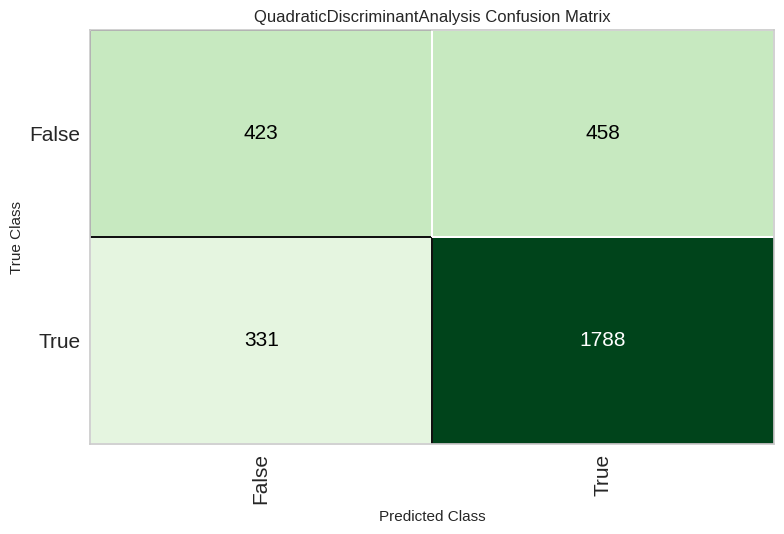

In [11]:
plot_model(best, plot = 'confusion_matrix')


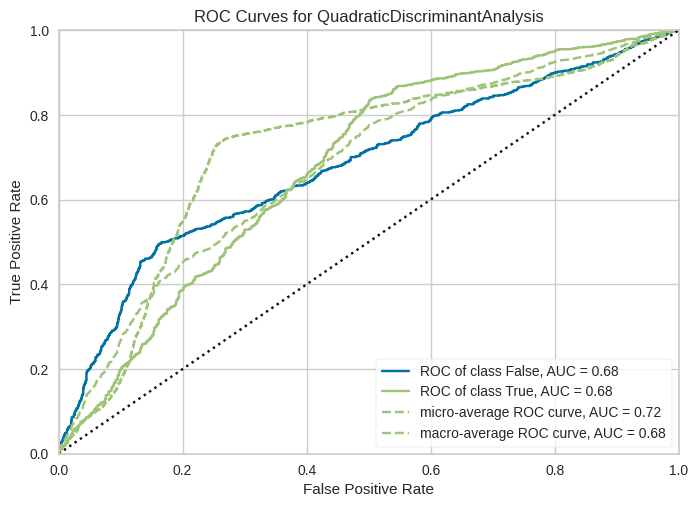

In [12]:
plot_model(best, plot = 'auc')


In [13]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:

dt = best

dt = tune_model(dt, choose_better = True)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7429,0.6665,0.8303,0.8107,0.8204,0.3683,0.3687
1,0.7586,0.7035,0.8788,0.7996,0.8373,0.3732,0.3795
2,0.7214,0.6582,0.8384,0.7830,0.8098,0.2920,0.2944
3,0.7700,0.7324,0.8768,0.8127,0.8435,0.4119,0.4162
4,0.7371,0.6541,0.8424,0.7973,0.8193,0.3389,0.3406
5,0.7529,0.6887,0.8482,0.8104,0.8289,0.3850,0.3863
6,0.7443,0.6892,0.8320,0.8107,0.8212,0.3728,0.3732
7,0.7300,0.6687,0.8340,0.7938,0.8134,0.3261,0.3274
8,0.6929,0.6323,0.7996,0.7730,0.7861,0.2423,0.2428


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
automl()

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.29,
                              store_covariance=False, tol=0.0001)

In [22]:
save_model(best, 'my_best_pipeline')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SessionLengthMin', 'TotalPrompts',
                                              'AI_AssistanceLevel',
                                              'SatisfactionRating'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Transfo...
                 ('pca',
                  TransformerWrapper(exclude=[], include=None,